# Week 6: Convolutional Neural Networks Lab

This week, we explore convolutional neural networks, a neural network architecture at the core of almost all computer vision tasks. We take a good look at how convolution operation is done in tensorflow and then build a simple convolutional neural network in tensorflow.

first, we load tensorflow, enable eager execution and import other libraries.

In [0]:
import tensorflow as tf
tf.enable_eager_execution()

import matplotlib.pyplot as plt
import numpy as np
import random

Let's use the popular MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [0]:
train_labels.shape

(60000,)

visualize few digits

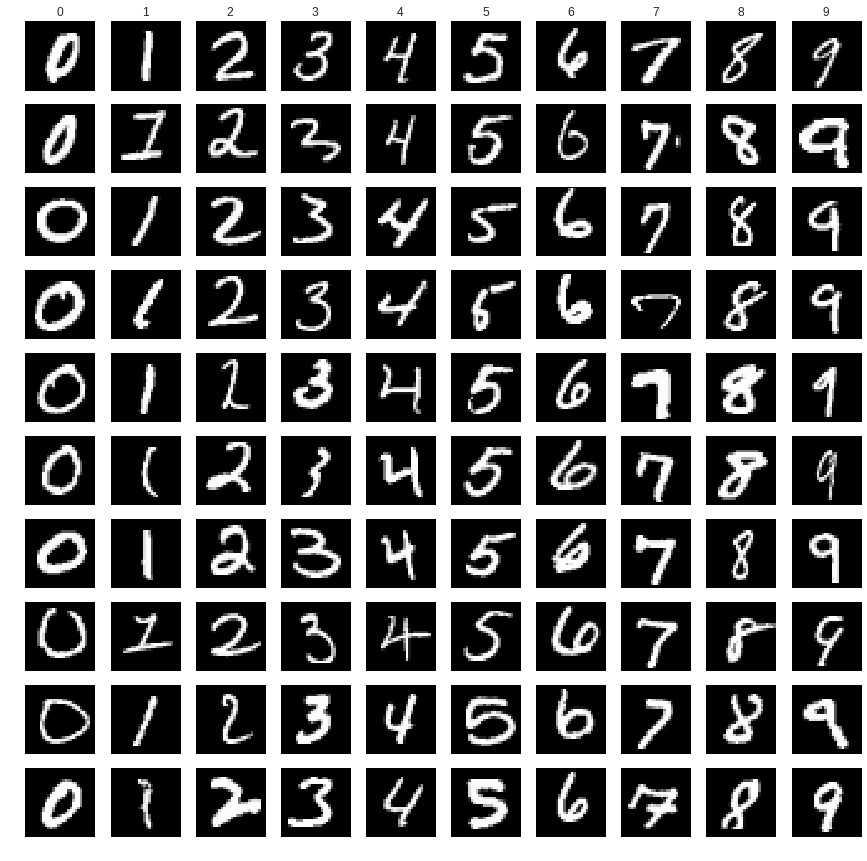

In [0]:
def plot_samples(n_samples=10):
    classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    num_classes = len(classes)
    samples_per_class = n_samples
    plt.figure(figsize=(15,15))
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(train_labels == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(train_images[idx].astype('uint8'), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()
    
plot_samples(10)

## Convolutions

Next, we select a random image and try out the convolution operation on it.

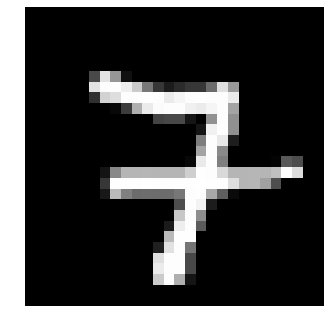

In [0]:
random_image = train_images[random.randint(0,1000)]
plt.imshow(random_image, cmap='gray'); plt.axis('off');

In CNNs, convolutions are carried out by sliding a filter through an input image. 

In [0]:
conv_filter = tf.random.normal(shape=(3,3,1,32), name='filter') # filter to use 32 3x3 filters
input_img = tf.Variable(random_image.reshape((1,28,28,1)), name='input', dtype=tf.float32) # input image
output = tf.nn.conv2d(input_img, conv_filter, [1,1,1,1], padding='VALID') # result of convolution

input width and height dimension  is 28x28x1

resulting output  dimension is 26x26x32 => 32 3x3x1 filters were used.


In [0]:
input_img.numpy().shape

(1, 28, 28, 1)

In [0]:
output.numpy().shape

(1, 26, 26, 32)

Convolutions can also be applied in tensorflow by using a convolutional layer.

In [0]:
conv_layer = tf.keras.layers.Conv2D(32, 3, 1, padding='valid')
output1 = conv_layer(input_img)

Instructions for updating:
Colocations handled automatically by placer.


In the code cell above, we defined a convolutional layer  object `conv_layer` using `tf.keras.layers.Conv2D(32, 3, 1, padding='valid')`. The parameters to the Conv2D class contructor defines the filters, strides and padding to be used for the convolutional layer. In the case, above, there are 32 filters of size 3. the stride is 1 and `padding='valid'` means that no padding is used. The input image is then fed into the convolutional layer and an output is obtained.


These gave similar results as the convolution operation above, `tf.nn.conv2d` in terms of the output shapes.

In [0]:
input_img.numpy().shape

(1, 28, 28, 1)

In [0]:
output1.numpy().shape

(1, 26, 26, 32)

## building a simple convolutional neural network

To build a CNN, the best approach is to use tf.keras layers and Models

In [0]:
def build_cnn():
  
  # Input layer
  input_x = tf.keras.layers.Input(shape=(28,28,1), name='input')
  
  # First convolutional layer (1)
  # Conv1_1
  conv1_1 = tf.keras.layers.Conv2D(32, 3, 1, padding='same', activation=tf.nn.relu, name='Conv1_1')(input_x)
  
  # Pool1_1
  pool1_1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), name='Pool1_1')(conv1_1) 
  
  # Second convolutional layer (2)
  # Conv2_1 
  conv2_1 = tf.keras.layers.Conv2D(64, 3, 1, padding='same', activation=tf.nn.relu, name='Conv2_1')(pool1_1)
  
  # Pool2_1
  pool2_1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), name='Pool2_1')(conv2_1) 
  
  # Flatten conv output
  flattened_conv = tf.keras.layers.Flatten(name='flatten')(pool2_1)
  
  # Fully connected layers
  # Fc3 (3)
  fc3 = tf.keras.layers.Dense(128, activation=tf.nn.relu, name='Fc3')(flattened_conv)
  
  # Fc4 (4)
  fc4 = tf.keras.layers.Dense(64, activation=tf.nn.relu,  name='Fc4')(fc3)
  
  # Fc5 (5)
  fc5 = tf.keras.layers.Dense(10, activation=tf.nn.softmax,  name='Fc5')(fc4)
  
  return tf.keras.models.Model(inputs=[input_x], outputs=[fc5])
  

In [0]:
# buid the model
model = build_cnn()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
Conv1_1 (Conv2D)             (None, 28, 28, 32)        320       
_________________________________________________________________
Pool1_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
_________________________________________________________________
Conv2_1 (Conv2D)             (None, 14, 14, 64)        18496     
_________________________________________________________________
Pool2_1 (MaxPooling2D)       (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
Fc3 (Dense)                  (None, 128)               401536    
__________

We've built a basic CNN similar to the LeNet-5 architecture. Let's go ahead and train this network on the MNIST dataset.

In [0]:
train_images = np.expand_dims(train_images, -1)


In [0]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, batch_size=5, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 49s 1ms/sample - loss: 7.9410 - acc: 0.4783 - val_loss: 0.1246 - val_acc: 0.9637
Epoch 2/5
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.0856 - acc: 0.9737 - val_loss: 0.0638 - val_acc: 0.9802
Epoch 3/5
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.0502 - acc: 0.9842 - val_loss: 0.0594 - val_acc: 0.9826
Epoch 4/5
48000/48000 [==============================] - 48s 1ms/sample - loss: 0.0333 - acc: 0.9898 - val_loss: 0.0464 - val_acc: 0.9868
Epoch 5/5
48000/48000 [==============================] - 48s 1ms/sample - loss: 0.0245 - acc: 0.9922 - val_loss: 0.0461 - val_acc: 0.9868
